In [1]:
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets.mnist import FashionMNIST

import unet_mnist
import ddpms
import utils

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}\t".strip().upper() + ": " + (f"{torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "CPU"))

USING CUDA: NVIDIA GeForce GTX 1650 with Max-Q Design


In [3]:
batch_size = 128
num_epochs = 20
learning_rate = 0.001
retrain = False
store_path = "ddpm_mnist_fashion_model.pt"

In [4]:
dataset = FashionMNIST("./datasets", download=True, train=True, transform=utils.transform)
loader = DataLoader(dataset, batch_size, shuffle=True)

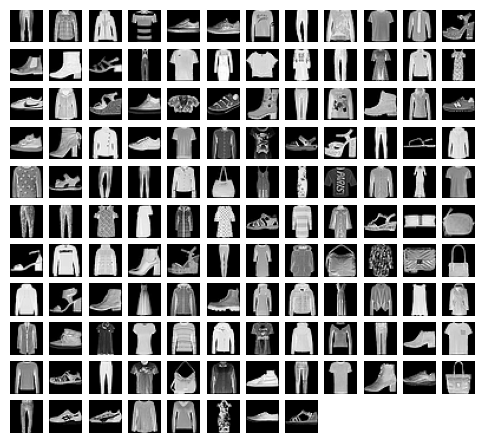

In [5]:
utils.view_batch0(loader)

In [6]:
# define model
n_steps = 1000
min_beta = 0.0001
max_beta = 0.02
ddpm = ddpms.DDPM(unet_mnist.UNet(n_steps), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device=device, loader=loader)

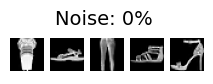

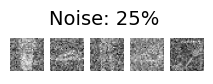

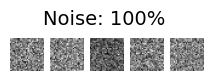

In [7]:
# visualise forward process
ddpm.show_forward([.25, 1])

In [8]:
# train
if retrain: ddpm.train_loop(num_epochs, optim=Adam(ddpm.parameters(), learning_rate), store_path="ddpm_mnist_fashion_model.pt")

In [9]:
# load best model and generate images
ddpm.load_state_dict(torch.load(store_path, map_location=device))
_ = ddpm.eval()

In [10]:
generated = ddpm.generate(n_samples=10)

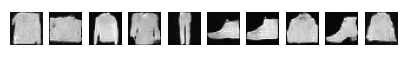

In [11]:
utils.view_images(images=generated, rows=1, cols=10)

In [13]:
real = next(iter(loader))[0]
print(real.shape)
fake = ddpm.generate(n_samples=128)
print(fake.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])


In [ ]:
ddpm.calculate_frechet(real, fake)